In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
iris_data=pd.read_csv('./Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.isnull().values.any()

False

In [8]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: ylabel='count'>

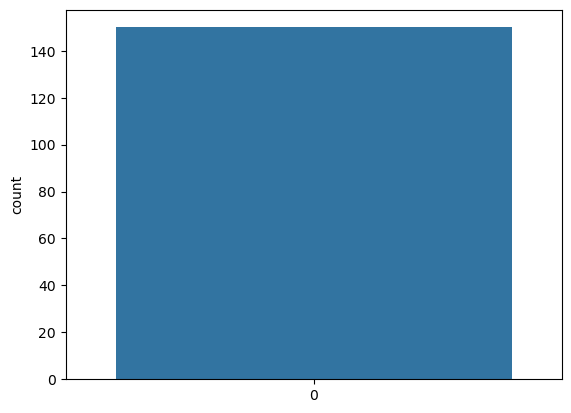

In [14]:
sns.countplot(iris_data['Id'])

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

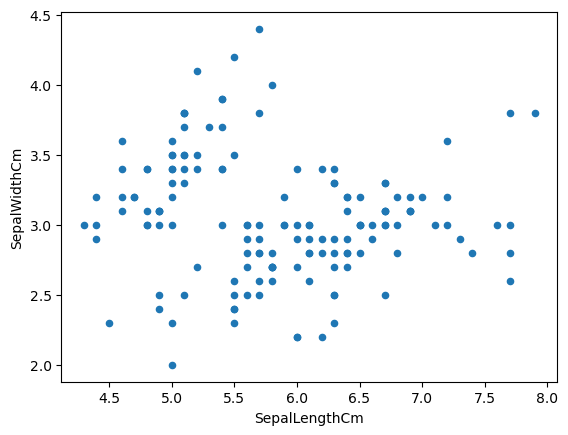

In [15]:
iris_data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

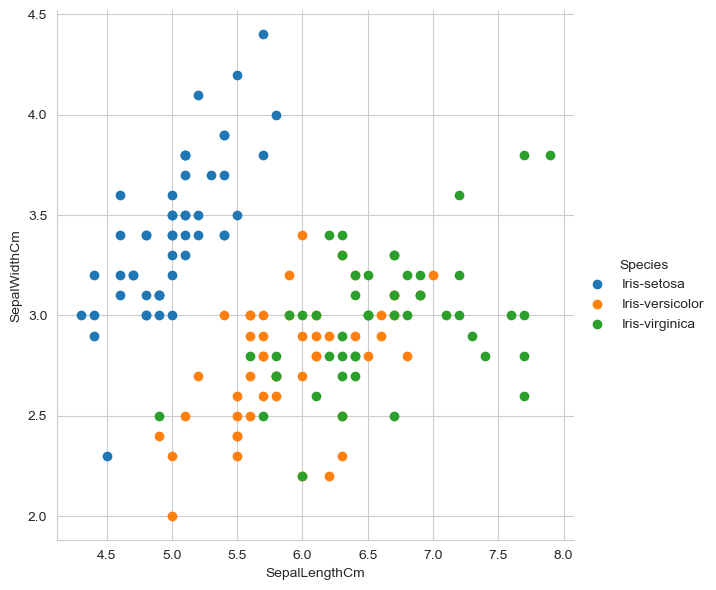

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data,hue='Species',height=6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

d:\Programming Files\anaconda\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


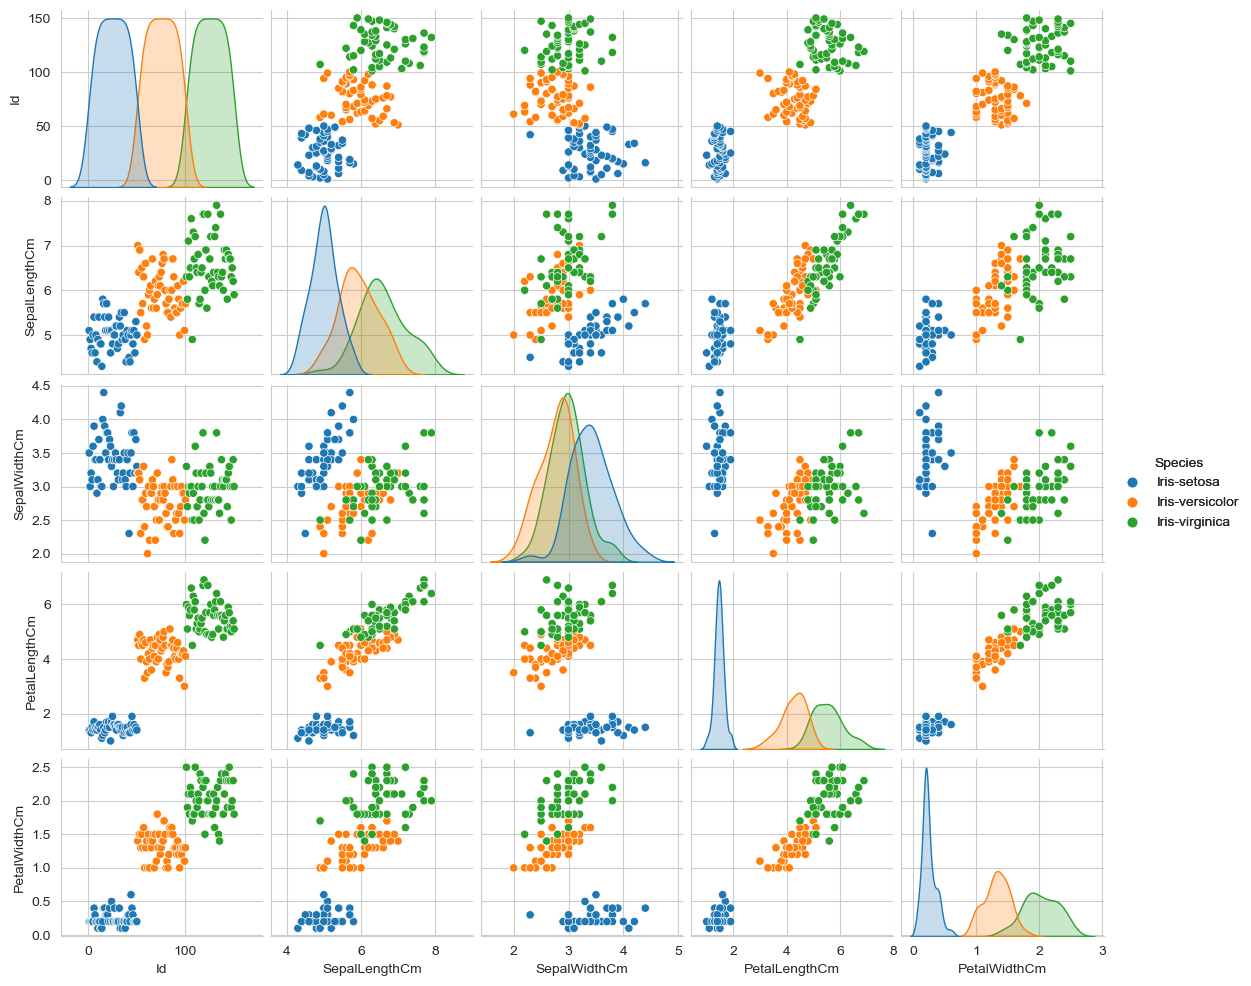

In [20]:
sns.pairplot(iris_data,hue='Species',height=2).add_legend()

In [23]:
for column in iris_data.columns:
    if iris_data[column].dtype==np.float64:
        continue
iris_data[column]=LabelEncoder().fit_transform(iris_data[column])

In [24]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [25]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [26]:
X=iris_data.drop(['Species'],axis=1)
y=iris_data['Species']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
k_range=list(range(1,12))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))


In [32]:
acc

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]